In [1]:
import pandas as pd
import plotly.graph_objects as go
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import numpy as np

In [2]:
import os 
project_path = os.getcwd()
root_path = os.path.abspath(os.path.join(project_path, os.pardir))
file_path = os.path.join(root_path,'data/dataframe_test.csv')
df = pd.read_csv(file_path)
print(df.head())

   id  month care_status  sex  age  education  wealth  distance_clinic
0   3    0.0           D  1.0  1.0        2.0     2.0              1.0
1   3    1.0           D  1.0  1.0        2.0     2.0              1.0
2   3    2.0           D  1.0  1.0        2.0     2.0              1.0
3   3    3.0           D  1.0  1.0        2.0     2.0              1.0
4   3    4.0           D  1.0  1.0        2.0     2.0              1.0


id = "Identifiant Patient", \
month = "Mois depuis la diagnostic", \
care_status = "Statut dans les soins", \
wealth = "Niveau de richesse", \
distance_clinic = "Distance à la clinique la plus proche" 

In [3]:
events= list(df["care_status"].unique())
events

['D', 'T', 'C', 'S']

"diagnostiqué, mais pas suivi" = "D", \
"suivi, mais pas sous traitement" = "C", \
"sous traitement, mais infection non contrôlée" = "T", \
"sous traitement et infection contrôlée" = "S"

In [4]:
selected_cols = df[['id', 'month', 'care_status']]
pivoted_data = selected_cols.pivot(index='id', columns='month', values='care_status')

# Renommer les colonnes avec un préfixe "month_"
pivoted_data.columns = ['month_' + str(int(col)+1) for col in pivoted_data.columns]

pivoted_data

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,month_42,month_43,month_44,month_45,month_46,month_47,month_48,month_49,month_50,month_51
id,,,,,,,,,,,,,,,,,,,,,
3,D,D,D,D,D,D,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,D,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,D,D,D,D,D,D,D,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,D,D,D,D,T,T,T,C,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,D,D,S,S,S,S,S,S,S,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,D,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9988,D,C,C,T,T,T,T,T,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9989,D,C,T,T,S,S,S,S,S,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
colors = ['red', 'blue', 'green', 'yellow']

fig = go.Figure()
for treatment, color in zip(events, colors):
    treatment_data = pivoted_data[pivoted_data.eq(treatment).any(axis=1)]
    months = treatment_data.columns
    
    # Calculate the percentage of patients under the current treatment for each month
    percentages = (treatment_data.apply(lambda x: x.value_counts().get(treatment, 0)) / len(treatment_data)) * 100

    fig.add_trace(go.Scatter(x=months, y=percentages, mode='lines', name=treatment, line=dict(color=color)))

fig.update_layout(
    title='Percentage of Patients under Each Treatment Over Time',
    xaxis_title='Time',
    yaxis_title='Percentage of Patients',
    legend_title='Treatment',
    yaxis=dict(tickformat=".2f")
)

fig.show()

In [6]:
drug_mapping = {"D":2, "C":4, "T":6, "S":8}
df_subsets_numeriques = pivoted_data.replace(drug_mapping)
df_subsets_numeriques

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,month_42,month_43,month_44,month_45,month_46,month_47,month_48,month_49,month_50,month_51
id,,,,,,,,,,,,,,,,,,,,,
3,2,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2,2.0,2.0,2.0,6.0,6.0,6.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9988,2,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9989,2,4.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Test des méthodes de clustering sur un échantillon de patients 

In [16]:
df_random_sample = df_subsets_numeriques.sample(n=300)
df_random_sample.shape

(300, 51)

In [49]:
df_random_sample1 = pivoted_data.sample(n=300) 
df_random_sample1.shape

(300, 51)

In [22]:
df_random_sample1.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,month_42,month_43,month_44,month_45,month_46,month_47,month_48,month_49,month_50,month_51
id,,,,,,,,,,,,,,,,,,,,,
7760,D,D,D,D,D,D,C,T,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,D,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8034,D,D,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567,D,D,D,D,D,D,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,D,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_random_sample1['Sequence'] = df_random_sample1.apply(lambda x: '-'.join(x.astype(str)), axis=1)
df_merged = df_random_sample1.reset_index().rename(columns = { 'index': 'id' })
df_merged = df_merged[['id', 'Sequence']]
df_merged.head()

,id,Sequence
0,8386,D-C-C-C-C-D-C-T-T-T-S-S-S-S-S-S-S-nan-nan-nan-...
1,5000,D-D-D-D-D-D-D-D-D-D-D-D-S-S-S-S-S-S-S-S-S-nan-...
2,9927,D-D-D-D-D-D-D-D-C-T-T-T-C-D-D-C-C-C-C-C-D-D-D-...
3,5096,D-D-nan-nan-nan-nan-nan-nan-nan-nan-nan-nan-na...
4,1840,D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-nan-nan-...


In [61]:
unique_states = sorted(set('-'.join(df_merged['Sequence']).replace('-', '')))
num_states = len(unique_states)
substitution_matrix = np.zeros((num_states, num_states))
print(substitution_matrix.shape)

(6, 6)


In [62]:
for i in range(num_states):
    for j in range(num_states):
        if i != j:
            substitution_matrix[i, j] = 1

substitution_df = pd.DataFrame(substitution_matrix, index=unique_states, columns=unique_states)
print(substitution_df)

     C    D    S    T    a    n
C  0.0  1.0  1.0  1.0  1.0  1.0
D  1.0  0.0  1.0  1.0  1.0  1.0
S  1.0  1.0  0.0  1.0  1.0  1.0
T  1.0  1.0  1.0  0.0  1.0  1.0
a  1.0  1.0  1.0  1.0  0.0  1.0
n  1.0  1.0  1.0  1.0  1.0  0.0


In [29]:
# Fonction pour calculer la matrice de substitution
def calculate_substitution_matrix(sequences):
    # Extraire les états uniques
    unique_states = sorted(set('-'.join(sequences)))
    num_states = len(unique_states)

    # Initialiser la matrice de substitution
    substitution_matrix = np.zeros((num_states, num_states))

    # Calculer les coûts de substitution (exemple simple : coût de 1 pour toutes les substitutions)
    for i in range(num_states):
        for j in range(num_states):
            if i != j:
                substitution_matrix[i, j] = 1

    # Créer un DataFrame pour la matrice de substitution
    substitution_df = pd.DataFrame(substitution_matrix, index=unique_states, columns=unique_states)

    return substitution_df

# Calculer la matrice de substitution
substitution_matrix = calculate_substitution_matrix(df1['Sequence'])

# Afficher la matrice de substitution
print(substitution_matrix)

     -    A    B    C    D
-  0.0  1.0  1.0  1.0  1.0
A  1.0  0.0  1.0  1.0  1.0
B  1.0  1.0  0.0  1.0  1.0
C  1.0  1.0  1.0  0.0  1.0
D  1.0  1.0  1.0  1.0  0.0


### 1. Avec la distance de Hamming

In [12]:
data_array_rs_ham = df_random_sample.to_numpy()

distance_matrix_rs_ham = pdist(
    data_array_rs_ham,
    metric='hamming' # Hamming distance is used for comparison of sequential data
                     # it is defined as the number of positions at which the corresponding symbols are different (0 if the symbols are the same and 1 if they are different)
    ) 
                                                                                                            
len(distance_matrix_rs_ham)

44850

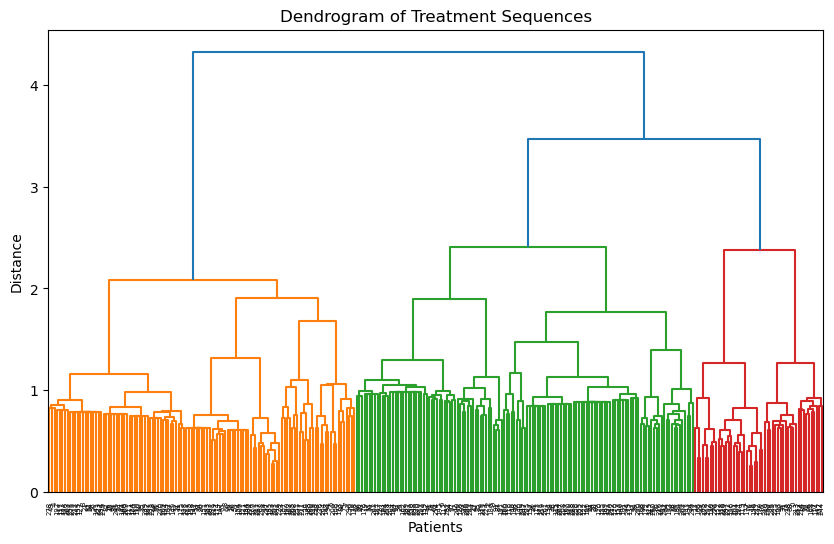

In [45]:
linkage_matrix_rs_ham = linkage(distance_matrix_rs_ham,
                                method='ward', # Ward's method minimizes the variance of the clusters being merged
                                optimal_ordering=True # reorders the data points to minimize the distance between the points in the dendrogram
                                )

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_rs_ham)
plt.title('Dendrogram of Treatment Sequences')
plt.xlabel('Patients')
plt.ylabel('Distance')
plt.show()

In [46]:
# A measure of how faithfully the dendrogram preserves the pairwise distances between the original data points.
# In other words, it compares the actual pairwise distances of the data points with the distances implied by the hierarchical clustering.
# A higher cophenetic correlation coefficient indicates that the clustering is a good representation of the data's structure.
c, coph_dists = cophenet(linkage_matrix_rs_ham, distance_matrix_rs_ham)
c

0.43712259588028074

In [16]:
leaves_order_rs_ham = list(hierarchy.leaves_list(linkage_matrix_rs_ham))
data_array_rs_ham_order = data_array_rs_ham[leaves_order_rs_ham]

colors = ['blue', 'orange', 'green', 'red']
heatmap_ham = go.Heatmap(z=data_array_rs_ham_order, colorscale= 'viridis')

# Créer une figure
fig = go.Figure(data=heatmap_ham)
fig.update_layout(
    title='TCA with Hamming Distance',
    xaxis_title='Temps',
    yaxis_title='Patients',
)

# Afficher le graphique
fig.show()

### 2. Avec la méthode Optimal Matching (algo Needleman-Wunsch)

In [1]:
import numpy as np
import pandas as pd

def seqcost(seqdata, method, cval=None, with_missing=False, miss_cost=None,
            time_varying=False, weighted=True, transition="both", lag=1,
            miss_cost_fixed=None, state_features=None, feature_weights=None,
            feature_type=None, proximities=False):

    # if not isinstance(seqdata, pd.DataFrame):
    #     raise ValueError("data is NOT a sequence object, see seqdef function to create one")

    # metlist = ["CONSTANT", "TRATE", "FEATURES", "FUTURE", "INDELS", "INDELSLOG"]
    # if method not in metlist:
    #     raise ValueError(f"method must be one of: {' '.join(metlist)}")

    # transitionlist = ["previous", "next", "both"]
    # if transition not in transitionlist:
    #     raise ValueError(f"transition must be one of: {' '.join(transitionlist)}")

    # if with_missing and not seqdata.isna().any().any():
    #     with_missing = False
    #     print("seqcost: 'with_missing' set as FALSE as 'seqdata' has no non-void missing values")

    ret = {}
    ret['indel'] = 1
    alphabet = sorted(set(''.join(seqdata['Sequence'].tolist())))

    cval4cond = time_varying and method == "TRATE" and transition == "both"
    if cval is None:
        cval = 4 if cval4cond else 2
    if miss_cost is None:
        miss_cost = cval
    if miss_cost_fixed is None:
        miss_cost_fixed = method in ["INDELS", "INDELSLOG"]

    if with_missing:
        alphabet.append('*')  # Assuming '*' represents missing values

    alphsize = len(alphabet)

    if method == "CONSTANT":
        if cval is None:
            raise ValueError("no value for the constant substitution-cost")
        if time_varying:
            time = seqdata.shape[1]
            print(f"creating {alphsize}x{alphsize}x{time} time varying substitution-cost matrix using {cval} as constant value")
            costs = np.full((alphsize, alphsize, time), cval)
            for i in range(time):
                np.fill_diagonal(costs[:, :, i], 0)
        else:
            print(f"creating {alphsize}x{alphsize} substitution-cost matrix using {cval} as constant value")
            costs = np.full((alphsize, alphsize), cval)
            np.fill_diagonal(costs, 0)

    elif method == "FUTURE":
        if time_varying:
            raise ValueError("time.varying substitution cost is not (yet) implemented for method FUTURE.")
        print("creating substitution-cost matrix using common future...")
        tr = seqtrate(seqdata, time_varying=False, weighted=weighted, lag=lag, with_missing=with_missing)
        costs = chisqdista(tr)
        np.fill_diagonal(costs, 0)
        ret['indel'] = 0.5 * np.max(costs)

    elif method == "FEATURES":
        if time_varying:
            raise ValueError("time.varying substitution cost is not (yet) implemented for method FEATURES.")
        if state_features is None or state_features.shape[0] != len(alphabet):
            raise ValueError("state.features should be a data.frame containing one row per state (possibly one for missing values).")
        if feature_weights is None:
            feature_weights = np.ones(state_features.shape[1])
        costs = daisy(state_features, metric="gower", weights=feature_weights, type=feature_type)
        np.fill_diagonal(costs, 0)
        ret['indel'] = 0.5 * np.max(costs)

    elif method in ["INDELS", "INDELSLOG"]:
        if time_varying:
            indels = seqstatd(seqdata, with_missing=with_missing)['Frequencies']
        else:
            ww = seqdata.get('weights', np.ones(seqdata.shape[0]))
            indels = np.array(pd.crosstab(np.repeat(ww, seqdata.shape[1]), np.hstack(seqdata.values)).loc[alphabet])

        indels[np.isnan(indels)] = 1
        if method == "INDELSLOG":
            indels = np.log(2 / (1 + indels))
        else:
            indels = 1 / indels
            indels[np.isinf(indels)] = np.finfo(np.float64).max

        ret['indel'] = indels

        if time_varying:
            time = seqdata.shape[1]
            print(f"creating {alphsize}x{alphsize}x{time} time varying substitution-cost matrix using {method}")
            costs = np.zeros((alphsize, alphsize, time))
            for t in range(time):
                for i in range(alphsize):
                    for j in range(alphsize):
                        if i != j:
                            costs[i, j, t] = indels[i, t] + indels[j, t]
        else:
            costs = np.zeros((alphsize, alphsize))
            for i in range(alphsize):
                for j in range(alphsize):
                    if i != j:
                        costs[i, j] = indels[i] + indels[j]

        costs[np.isinf(costs)] = np.finfo(np.float64).max

    elif method == "TRATE":
        if time_varying:
            print("creating time varying substitution-cost matrix using transition rates ...")
            tr = seqtrate(seqdata, time_varying=True, weighted=weighted, lag=lag, with_missing=with_missing)
            tmat = tr.shape[0]
            time = seqdata.shape[1]
            costs = np.zeros((alphsize, alphsize, time))

            def tratecostBoth(trate, time, state1, state2, debut, fin):
                cost = 0
                if not debut:
                    cost -= trate[state1, state2, time - 1] + trate[state2, state1, time - 1]
                if not fin:
                    cost -= trate[state1, state2, time] + trate[state2, state1, time]
                if not debut and not fin:
                    return cost + cval
                else:
                    return cval + 2 * cost

            def tratecostPrevious(trate, time, state1, state2, debut, fin):
                cost = 0
                if not debut:
                    cost -= trate[state1, state2, time - 1] + trate[state2, state1, time - 1]
                return cval + cost

            def tratecostNext(trate, time, state1, state2, debut, fin):
                cost = 0
                if not fin:
                    cost -= trate[state1, state2, time] + trate[state2, state1, time]
                return cval + cost

            if transition == "previous":
                tratecost = tratecostPrevious
            elif transition == "next":
                tratecost = tratecostNext
            else:
                tratecost = tratecostBoth

            for t in range(time):
                for i in range(tmat - 1):
                    for j in range(i + 1, tmat):
                        cost = max(0, tratecost(tr, t, i, j, t == 1, t == time))
                        costs[i, j, t] = cost
                        costs[j, i, t] = cost
        else:
            print("creating substitution-cost matrix using transition rates ...")
            tr = seqtrate(seqdata, time_varying=False, weighted=weighted, lag=lag, with_missing=with_missing)
            tmat = tr.shape[0]
            costs = np.zeros((alphsize, alphsize))
            np.fill_diagonal(costs, 0)
            for i in range(tmat - 1):
                for j in range(i + 1, tmat):
                    cost = cval - tr[i, j] - tr[j, i]
                    costs[i, j] = cost
                    costs[j, i] = cost
            ret['indel'] = 0.5 * np.max(costs)

    if with_missing and miss_cost_fixed:
        if time_varying:
            costs[alphsize, :(alphsize - 1), :] = miss_cost
            costs[:(alphsize - 1), alphsize, :] = miss_cost
        else:
            costs[alphsize, :(alphsize - 1)] = miss_cost
            costs[:(alphsize - 1), alphsize] = miss_cost

    if time_varying:
        dimnames = [alphabet, alphabet, seqdata.columns]
    else:
        dimnames = [alphabet, alphabet]

    if proximities:
        ret['prox'] = 1 - costs / np.max(costs)
    else:
        ret['sm'] = costs

    return ret

# Helper functions (simplified versions)
def seqtrate(seqdata, time_varying, weighted, lag, with_missing):
    # Placeholder for seqtrate function
    return np.random.rand(len(seqdata), len(seqdata), seqdata.shape[1] if time_varying else 1)

def chisqdista(mat):
    cs = np.sum(mat, axis=0)
    cs[cs == 0] = np.inf
    Pdot = 1 / cs
    n = mat.shape[0]
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            dist[i, j] = np.sum(Pdot * (mat[i, :] - mat[j, :])**2)
            dist[j, i] = dist[i, j]
    return np.sqrt(dist)

def daisy(state_features, metric, weights, type):
    # Placeholder for daisy function
    return np.random.rand(state_features.shape[0], state_features.shape[0])

def seqstatd(seqdata, with_missing):
    # Placeholder for seqstatd function
    return {'Frequencies': np.random.rand(seqdata.shape[0], seqdata.shape[1])}

# Example usage
data = {
    'ID': [1, 2, 3, 4, 5],
    'Sequence': [
        'A-B-C',
        'A-B-D',
        'A-C-D',
        'B-C-D',
        'A-B-C-D'
    ]
}

df = pd.DataFrame(data)
result = seqcost(df, method="CONSTANT", cval=2)
print(result)


creating 5x5 substitution-cost matrix using 2 as constant value
{'indel': 1, 'sm': array([[0, 2, 2, 2, 2],
       [2, 0, 2, 2, 2],
       [2, 2, 0, 2, 2],
       [2, 2, 2, 0, 2],
       [2, 2, 2, 2, 0]])}


In [2]:
ret = {}
ret['indel'] = 1
alphabet = sorted(set(''.join(df['Sequence'].tolist())))
print(alphabet)

['-', 'A', 'B', 'C', 'D']


In [ ]:
# Fonction pour calculer la matrice de substitution
def calculate_substitution_matrix(sequences):
    # Extraire les états uniques
    unique_states = sorted(set(''.join(sequences)))
    num_states = len(unique_states)

    # Initialiser la matrice de substitution
    substitution_matrix = np.zeros((num_states, num_states))

    # Calculer les coûts de substitution (exemple simple : coût de 1 pour toutes les substitutions)
    for i in range(num_states):
        for j in range(num_states):
            if i != j:
                substitution_matrix[i, j] = 1

    # Créer un DataFrame pour la matrice de substitution
    substitution_df = pd.DataFrame(substitution_matrix, index=unique_states, columns=unique_states)

    return substitution_df

# Calculer la matrice de substitution
substitution_matrix = calculate_substitution_matrix(df1['Sequence'])

# Afficher la matrice de substitution
print(substitution_matrix)

In [7]:
def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-2):
    m, n = len(seq1), len(seq2)
    score_matrix = np.zeros((m+1, n+1))

    # Initialisation de la matrice de scores
    score_matrix[:, 0] = gap_penalty * np.arange(m+1)
    score_matrix[0, :] = gap_penalty * np.arange(n+1)

    # Remplissage de la matrice de scores
    match_mismatch = np.vectorize(lambda x, y: match_score if x == y else mismatch_score)
    for i in range(1, m+1):
        for j in range(1, n+1):
            match = score_matrix[i-1, j-1] + match_mismatch(seq1[i-1], seq2[j-1])
            delete = score_matrix[i-1, j] + gap_penalty
            insert = score_matrix[i, j-1] + gap_penalty
            score_matrix[i, j] = max(match, delete, insert)

    # Score d'alignement optimal
    optimal_score = score_matrix[m, n]

    return optimal_score

In [8]:
def sequence_distance(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-2):
    optimal_score = needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    max_length = max(len(seq1), len(seq2))
    normalized_score = optimal_score / max_length
    distance = 1 - normalized_score
    return distance

In [12]:
# distances = []
# for i in range(len(df_subsets_numeriques)):
#     for j in range(i + 1, len(df_subsets_numeriques)):
#         seq1 = df_subsets_numeriques.iloc[i].dropna().values
#         seq2 = df_subsets_numeriques.iloc[j].dropna().values
#         # optimal_score, scores_matrix = needleman_wunsch(first_array_nw, second_array_nw)
#         distances.append(sequence_distance(seq1, seq2))

# distance_matrix_rs_nw = np.array(distances)
distance_matrix_rs_nw = np.zeros((len(df_subsets_numeriques), len(df_subsets_numeriques)))

for i in range(len(df_subsets_numeriques)):
    for j in range(i + 1, len(df_subsets_numeriques)):
        seq1 = df_subsets_numeriques.iloc[i].dropna().values
        seq2 = df_subsets_numeriques.iloc[j].dropna().values
        distance_matrix_rs_nw[i, j] = sequence_distance(seq1, seq2)
        distance_matrix_rs_nw[j, i] = distance_matrix_rs_nw[i, j]  # Symmetric matrix

distance_matrix_rs_nw

array([[0.        , 2.        , 0.75      , ..., 2.33333333, 2.6       ,
        2.36842105],
       [2.        , 0.        , 2.25      , ..., 2.66666667, 2.8       ,
        2.68421053],
       [0.75      , 2.25      , 0.        , ..., 2.16666667, 2.5       ,
        2.26315789],
       ...,
       [2.33333333, 2.66666667, 2.16666667, ..., 0.        , 1.2       ,
        1.10526316],
       [2.6       , 2.8       , 2.5       , ..., 1.2       , 0.        ,
        0.95      ],
       [2.36842105, 2.68421053, 2.26315789, ..., 1.10526316, 0.95      ,
        0.        ]])

In [10]:
distances = []
for i in range(len(df_subsets_numeriques)):
    for j in range(i + 1, len(df_subsets_numeriques)):
        seq1 = df_subsets_numeriques.iloc[i].dropna().values
        seq2 = df_subsets_numeriques.iloc[j].dropna().values
        # optimal_score, scores_matrix = needleman_wunsch(first_array_nw, second_array_nw)
        distances.append(sequence_distance(seq1, seq2))

distance_matrix_rs_nw = np.array(distances)

KeyboardInterrupt: 

In [17]:
# def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-2):
#     m, n = len(seq1), len(seq2)
#     score_matrix = np.zeros((m+1, n+1))

#     # Initialisation de la matrice de scores
#     for i in range(m+1):
#         score_matrix[i, 0] = gap_penalty * i
#     for j in range(n+1):
#         score_matrix[0, j] = gap_penalty * j

#     # Remplissage de la matrice de scores
#     for i in range(1, m+1):
#         for j in range(1, n+1):
#             match = score_matrix[i-1, j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
#             delete = score_matrix[i-1, j] + gap_penalty
#             insert = score_matrix[i, j-1] + gap_penalty
#             score_matrix[i, j] = max(match, delete, insert)

#     # Score d'alignement optimal
#     optimal_score = score_matrix[m, n]

#     return optimal_score#, score_matrix

# def sequence_distance(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-2):
#     optimal_score = needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
#     max_length = max(len(seq1), len(seq2))
#     normalized_score = optimal_score / max_length
#     distance = 1 - normalized_score
#     return distance


In [9]:
distances = []
for i in range(len(df_random_sample)):
    for j in range(i + 1, len(df_random_sample)):
        seq1 = df_random_sample.iloc[i].dropna().values
        seq2 = df_random_sample.iloc[j].dropna().values
        # optimal_score, scores_matrix = needleman_wunsch(first_array_nw, second_array_nw)
        distances.append(sequence_distance(seq1, seq2))

distance_matrix_rs_nw = np.array(distances)

NameError: name 'df_random_sample' is not defined

In [19]:
distance_matrix_rs_nw.shape

(44850,)

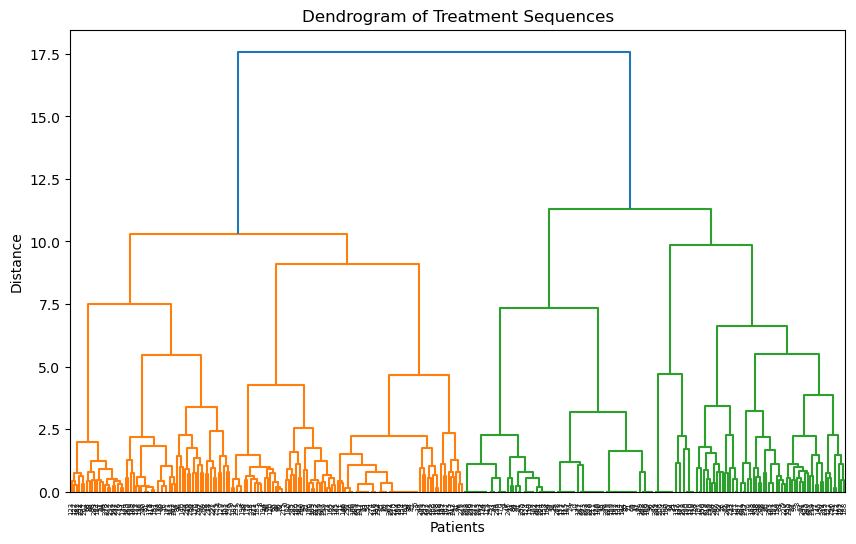

In [61]:
linkage_matrix_rs_nw = linkage(np.abs(distance_matrix_rs_nw), method='ward')#, optimal_ordering=True)

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_rs_nw)
plt.title('Dendrogram of Treatment Sequences')
plt.xlabel('Patients')
plt.ylabel('Distance')
plt.show()

In [62]:
c, coph_dists = cophenet(linkage_matrix_rs_nw, np.abs(distance_matrix_rs_nw))
c

0.654399658308432

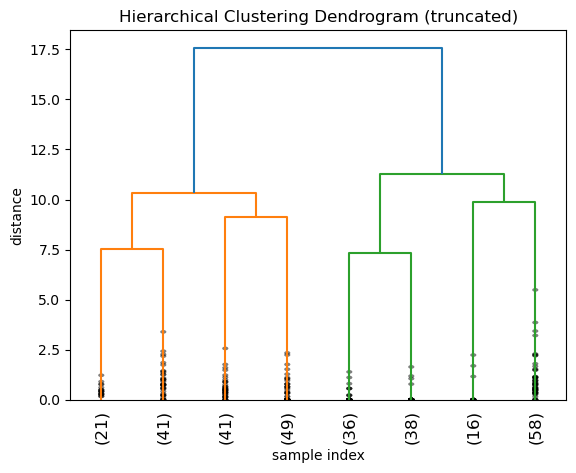

In [63]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage_matrix_rs_nw,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=8,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()


In [64]:
from scipy.cluster.hierarchy import fcluster

max_d = 6
clusters = fcluster(linkage_matrix_rs_nw, max_d, criterion='distance')
len(clusters)

300

In [65]:
results1 = df_random_sample.copy()
results1['cluster'] = clusters
results1 = results1[['cluster'] + [col for col in results1.columns if col != 'cluster']]

In [66]:
results1

,cluster,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_42,month_43,month_44,month_45,month_46,month_47,month_48,month_49,month_50,month_51
id,,,,,,,,,,,,,,,,,,,,,
3125,3,2,2.0,2.0,2.0,2.0,2.0,6.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,5,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,3,2,2.0,2.0,2.0,6.0,6.0,6.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9915,9,2,4.0,4.0,4.0,8.0,8.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,2,2,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,...,6.0,6.0,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,8,2,2.0,4.0,4.0,4.0,4.0,2.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5224,9,2,2.0,2.0,2.0,2.0,2.0,4.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3818,5,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data_array_rs_nw = df_random_sample.to_numpy()

leaves_order_rs_nw = list(hierarchy.leaves_list(linkage_matrix_rs_nw))
data_array_rs_nw_order = data_array_rs_nw[leaves_order_rs_nw]

colors = ['blue', 'orange', 'green', 'red']
heatmap_nw = go.Heatmap(z=data_array_rs_nw_order, colorscale= 'viridis')

# Créer une figure
fig = go.Figure(data=heatmap_nw)
fig.update_layout(
    title='TCA with Optimal Matching Distance',
    xaxis_title='Temps',
    yaxis_title='Patients',
)

# Afficher le graphique
fig.show()

In [106]:
n = len(df_subsets_numeriques)
m = len(df_subsets_numeriques.iloc[0])
distance_matrix = np.zeros((n, m))
distance_matrix.shape

(2929, 51)

In [113]:
for i in range(n):
    for j in range(i + 1, n):

        seq1 = df_subsets_numeriques.iloc[i].dropna().values
        seq2 = df_subsets_numeriques.iloc[j].dropna().values
        len1, len2 = len(seq1), len(seq2)
        dp = np.zeros((len1 + 1, len2 + 1))

        print(seq1[:len1])

        # print(substitution_cost_matrix(len(dp)))[seq1[:len1, None], seq2[:len2]]

        break


        # Calculate the substitution cost matrix for the current pair of sequences
        # substitution_cost = substitution_cost_matrix(len(dp))[seq1[:len1, None], seq2[:len2]]

[2. 2. 2. 2. 2. 2.]
[2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 6. 6. 6. 4. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 6. 6. 6. 6. 6. 6. 6. 6. 6.]
[2. 2. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[2. 2. 2. 2. 2. 2.]
[2. 4. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
[2. 2. 2. 2. 4. 6. 6. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[2. 4. 6. 6. 6. 6. 6. 6. 6. 6. 6. 8.]
[2. 2. 2. 2.]
[2. 2. 2. 2. 2. 2. 4. 8. 8. 8. 8. 4.]
[4. 6. 6. 6. 6. 6. 4. 4. 4. 6. 6. 6. 4. 4. 4. 6. 6. 6. 4. 4. 4.]
[2. 2. 2. 2. 2. 2. 2. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4.]
[8. 8. 8. 8. 8. 8. 8.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 4. 4. 4. 4. 4.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2.]
[2. 4. 4. 4. 4. 4. 4. 4. 6. 6. 6. 6. 6. 6. 8. 8. 8. 8. 8.]
[2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2. 4. 6. 6. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[2. 2. 2.

In [102]:
# # A function for determining the score between any two bases in alignment
# def substitution_cost_matrix(alpha, beta, match_score=2, mismatch_score=-2):
#     if alpha == beta:
#         return match_score
#     # elif alpha == '-' or beta == '-':
#     #     return gap_penalty
#     else:
#         return mismatch_score

def substitution_cost_matrix(size, match_score=2, mismatch_score=-2):
    matrix = np.eye(size) * match_score
    matrix[matrix == 0] = mismatch_score
    
    return matrix
    
def compute_distance_matrix(sequences, gap_penalty=-5):
    n = len(sequences)
    m = len(sequences.iloc[0])
    distance_matrix = np.zeros((n, m))

    for i in range(n):
        for j in range(i + 1, n):

            seq1 = sequences.iloc[i].dropna().values
            seq2 = sequences.iloc[j].dropna().values
            len1, len2 = len(seq1), len(seq2)
            dp = np.zeros((len1 + 1, len2 + 1))

            # Calculate the substitution cost matrix for the current pair of sequences
            substitution_cost = substitution_cost_matrix(len(dp))[seq1[:len1, None], seq2[:len2]]

            # Calculate the optimal scores using vectorized operations
            dp[1:, 1:] = np.maximum(dp[:-1, :-1] + substitution_cost, dp[:-1, 1:] + gap_penalty, dp[1:, :-1] + gap_penalty)
            dp[1:, 0] = dp[:-1, 0] + gap_penalty
            dp[0, 1:] = dp[0, :-1] + gap_penalty

            # Calculate the optimal score for the entire sequences
            optimal_score = dp[-1, -1]

            # Calculate the distance using the optimal score and the maximum sequence length
            max_length = max(len1, len2)
            normalized_score = optimal_score / max_length
            distance = 1 - normalized_score

            # Assign the distance to the distance matrix
            distance_matrix[i, j] = distance
            # distance_matrix[j, i] = distance

    return distance_matrix

# Call the optimized function
distance_matrix = compute_distance_matrix(df_subsets_numeriques)
print("Optimized distance matrix:\n", distance_matrix)

IndexError: arrays used as indices must be of integer (or boolean) type

In [74]:
# first_array_nw = df_random_sample.iloc[0].dropna().values
# display(first_array_nw)

# second_array_nw = df_random_sample.iloc[1].dropna().values
# display(second_array_nw)

In [73]:
# scores_matrix

# max_length = max(len(first_array_nw), len(second_array_nw))
# normalized_score = optimal_score / max_length
# distance = 1 - np.abs(normalized_score)
# distance

In [72]:
# data_array_nw = df_random_sample.to_numpy()

# distances = []
# for i in range(len(data_array_nw)):
#     for j in range(i + 1, len(data_array_nw)):
#         distances.append(sequence_distance(data_array_nw[i], data_array_nw[j]))

# distance_matrix_nw = np.array(distances)
# len(distance_matrix_nw)

In [95]:
df_subsets_numeriques.shape[0] * df_subsets_numeriques.shape[1]

149379

In [96]:
# data_array_nw = df_random_sample.to_numpy()

len(distance_matrix_nw)

2928

In [87]:
distance_matrix_nw

array([1.64864865, 2.18918919, 1.94594595, ..., 2.33333333, 2.63636364,
       1.36363636])

_____

In [8]:
from scipy.spatial.distance import cdist

def optimal_matching_distance(seq1, seq2, substitution_cost_matrix):
    len1, len2 = len(seq1), len(seq2)
    dp = np.zeros((len1 + 1, len2 + 1))

    for i in range(len1+1):
        for j in range(len2+1):
            
            if i == 0:
                dp[i, j] = j
            elif j == 0:
                dp[i, j] = i
            else:
                print(f" i : {i}, j: {j}")
                substitution_cost = substitution_cost_matrix[seq1[i-1], seq2[j-1]]
                dp[i, j] = min(dp[i-1, j] + 1,
                               dp[i, j-1] + 1,
                               dp[i-1, j-1] + substitution_cost)
                print(f"    -> dp[{str(i)}, {str(j)}] :", dp[i, j])

    return dp[len1, len2]

# Exemple de matrice de coût de substitution
substitution_cost_matrix = np.array([[0, 1, 2],
                                     [1, 0, 1],
                                     [2, 1, 0]])

# Exemple de séquences
seq1 = [0, 1, 2]
seq2 = [1, 0, 2]

distance = optimal_matching_distance(seq1, seq2, substitution_cost_matrix)
print("Distance Optimal Matching:", distance)

 i : 1, j: 1
    -> dp[1, 1] : 1.0
 i : 1, j: 2
    -> dp[1, 2] : 1.0
 i : 1, j: 3
    -> dp[1, 3] : 2.0
 i : 2, j: 1
    -> dp[2, 1] : 1.0
 i : 2, j: 2
    -> dp[2, 2] : 2.0
 i : 2, j: 3
    -> dp[2, 3] : 2.0
 i : 3, j: 1
    -> dp[3, 1] : 2.0
 i : 3, j: 2
    -> dp[3, 2] : 3.0
 i : 3, j: 3
    -> dp[3, 3] : 2.0
Distance Optimal Matching: 2.0


In [30]:
def compute_distance_matrix(sequences, substitution_cost_matrix):
    n = len(sequences)
    distance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            distance_matrix[i, j] = optimal_matching_distance(sequences[i], sequences[j], substitution_cost_matrix)
            distance_matrix[j, i] = distance_matrix[i, j]

    return distance_matrix

In [63]:
# 4 états possibles :
#   "D" : "diagnostiqué, mais pas suivi",
#   "C" : "suivi, mais pas sous traitement",
#   "T" : "sous traitement, mais infection non contrôlée",
#   "S" : "sous traitement et infection contrôlée"
 
substitution_cost_matrix = [
    [0, 1, 2, 3],  # Coûts pour "D"
    [1, 0, 1, 2],  # Coûts pour "C"
    [2, 1, 0, 1],  # Coûts pour "T"
    [3, 2, 1, 0]   # Coûts pour "S"
]

df_subsets_numeriques_fillna = df_subsets_numeriques.fillna(-1)
sequences = df_subsets_numeriques_fillna.to_numpy()
sequences = [row.tolist() for row in sequences]
len(sequences[0])

In [10]:
df_subsets_numeriques_fillna = df_subsets_numeriques.fillna(-1)
sequences = df_subsets_numeriques_fillna.to_numpy()
sequences = [row.tolist() for row in sequences]

n = len(sequences)
distance_matrix = np.zeros((n, n))

for k in range(n):
    for l in range(k + 1, n):
        len1, len2 = len(sequences[k]), len(sequences[l])
        dp = np.zeros((len1 + 1, len2 + 1))

        for i in range(len1+1):
            for j in range(len2+1):
            
                if i == 0:
                    dp[i, j] = j
                elif j == 0:
                    dp[i, j] = i
                else:
                    print(f" i : {i}, j: {j}")
                    substitution_cost = substitution_cost_matrix[seq1[i-1], seq2[j-1]]
                    dp[i, j] = min(dp[i-1, j] + 1,
                                dp[i, j-1] + 1,
                                dp[i-1, j-1] + substitution_cost)
                    
                    
        
        # distance_matrix[i, j] = optimal_matching_distance(sequences[i], sequences[j], substitution_cost_matrix)
        # distance_matrix[j, i] = distance_matrix[i, j]

 i : 1, j: 1
 i : 1, j: 2
 i : 1, j: 3
 i : 1, j: 4


IndexError: list index out of range

In [69]:
distance_matrix = compute_distance_matrix(sequences, substitution_cost_matrix)
print("Matrice de distances:\n", distance_matrix)

 i : 1, j: 1


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices